In [0]:
from google.colab import files
files.upload()

Saving income_prediction_2.csv to income_prediction_2 (2).csv


{'income_prediction_2.csv': b'id,stage,source_program_type,home_exists,home_count,home_total,home_max,property_exists,property_count,property_total,property_max,hp_exists,hp_count,hp_total,hp_max,auto_exists,auto_count,auto_total,auto_max,other_exists,other_count,other_total,other_max,card_exists,card_count,card_total,card_max,unsecured_avg,income\r\n10122,qualified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1060262,700000,1,1,29330,29330,1089592,41000\r\n10332,qualified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36700\r\n10521,qualified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33333\r\n10654,qualified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,20000,20000,1,1,18952,18952,38952,18000\r\n10850,qualified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28359\r\n11078,qualified,0,1,1,475000,475000,1,1,200000,200000,1,2,675000,475000,0,0,0,0,0,0,0,0,1,2,81969,51954,81969,22000\r\n11102,converted,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1008599,600000,1,3,278513,264039,1287112,551

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.float_format = '{:20,.2f}'.format
data = pd.read_csv('income_prediction_2.csv')
data['home_avg'] = data['home_total'] / data['home_count']
data['property_avg'] = data['property_total'] / data['property_count']
data['hp_avg'] = data['hp_total'] / data['hp_count']
data['auto_avg'] = data['auto_total'] / data['auto_count']
data['other_avg'] = data['other_total'] / data['other_count']
data['card_avg'] = data['card_total'] / data['card_count']
data['ehome_avg'] = data['ehome_total'] / data['ehome_count']
data_backup = data.copy()
print(data_backup.shape)
data_backup.head()
data.drop('income', axis=1, inplace=True)
xTrain, xTest, yTrain, yTest = train_test_split(data, data_backup['income'], test_size = 0.20, random_state = 1)
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)
xTest.fillna(0, inplace=True)
test_data = pd.concat([xTest, yTest], axis=1)
income = test_data.copy()
data_backup.head()

(8001, 40)
(6400, 39)
(1601, 39)
(6400,)
(1601,)


,id,stage,source_program_type,income,ehome_exists,ehome_count,ehome_total,ehome_max,home_exists,home_count,home_total,home_max,property_exists,property_count,property_total,property_max,hp_exists,hp_count,hp_total,hp_max,auto_exists,auto_count,auto_total,auto_max,other_exists,other_count,other_total,other_max,card_exists,card_count,card_total,card_max,unsecured_avg,home_avg,property_avg,hp_avg,auto_avg,other_avg,card_avg,ehome_avg
0,10122,qualified,0,"41,000.00",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1060262,700000,1,1,29330,29330,1089592,nan,nan,nan,nan,"530,131.00","29,330.00",nan
1,10332,qualified,0,"36,700.00",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan
2,10521,qualified,0,"33,333.00",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan
3,10654,qualified,0,"18,000.00",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,20000,20000,1,1,18952,18952,38952,nan,nan,nan,nan,"20,000.00","18,952.00",nan
4,10850,qualified,0,"28,359.00",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan


sample count 784
home total:-  0.6074709961467468
home avg  :-  0.4491129732578857
home max  :-  0.5399101922695005
model score : 0.2915030157164892


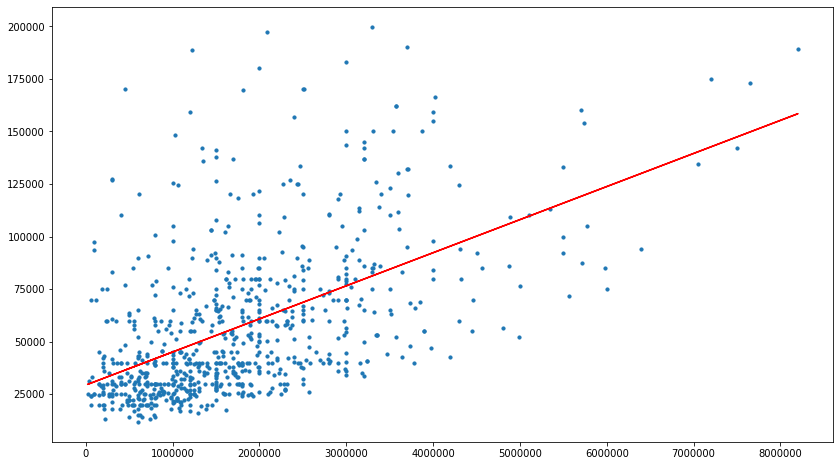

In [20]:
data = data_backup.copy()
data = data[data.home_exists != 0]
# data = data[data["source policy"] != "Vanilla"]
data = data[(data.income < 200000) & (data.income > 5000) & (~data.income.isin([50000,100000]))]
data = data[(data.home_max < 9000000) & (data.home_max > 10000)]
data = data[data['home_total'] < data['income'] * 100]
print("sample count",len(data.index))
print("home total:- ",data['home_total'].corr(data['income']))
print("home avg  :- ",data['home_avg'].corr(data['income']))
print("home max  :- ",data['home_max'].corr(data['income']))
x_train = data[['home_max']]
y_train = data[['income']]
model = linear_model.LinearRegression()
# model = linear_model.Ridge(alpha=.5)
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.figure(figsize=(14,8))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()

sample count 183
ehome total:-  0.4239778441445634
ehome avg  :-  0.3774936088646843
ehome max  :-  0.39675340520267816
model score : 0.1574132645399201


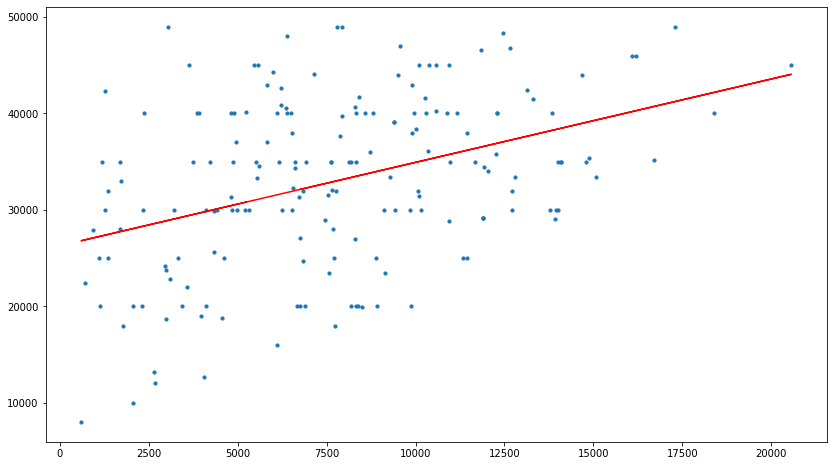

,home_max,ehome_max
17,650000,6755
92,0,9276
143,0,6528
174,0,15080
236,0,7646
...,...,...
7848,0,7700
7880,3000000,8137
7902,0,2340
7913,0,6600


In [17]:
data = data_backup.copy()
data = data[data.ehome_exists != 0]
data = data[(data.income < 50000) & (data.income > 5000) & (~data.income.isin([50000,100000]))]
data = data[(data.ehome_max < 60000) & (data.ehome_max > 500)]
# data = data[(data.home_max < 9000000) & (data.home_max > 10000)]
data = data[2 * data['ehome_total'] < data['income']]
print("sample count",len(data.index))
print("ehome total:- ",data['ehome_total'].corr(data['income']))
print("ehome avg  :- ",data['ehome_avg'].corr(data['income']))
print("ehome max  :- ",data['ehome_max'].corr(data['income']))
x_train = data[['ehome_max']]
y_train = data[['income']]
model = linear_model.LinearRegression()
# model = linear_model.Ridge(alpha=.5)
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.figure(figsize=(14,8))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()
data[['home_max','ehome_max']].head(300)

sample count 163
property total:-  0.523740793043691
property avg  :-  0.42587187881517613
property max  :-  0.46103114207934137
model score : 0.21254971396698175


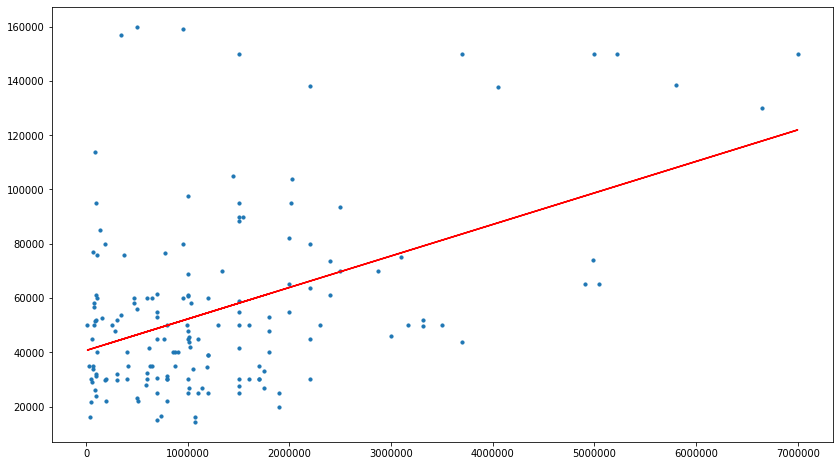

In [23]:
data = data_backup.copy()
data = data[data.property_exists != 0]
# data = data[data["source policy"] != "Vanilla"]
data = data[(data.income < 200000) & (data.income > 5000) & (~data.income.isin([100000]))]
data = data[(data.property_max < 9000000) & (data.property_max > 10000)]
data = data[data['property_total'] < data['income']*100]
print("sample count",len(data.index))
print("property total:- ",data['property_total'].corr(data['income']))
print("property avg  :- ",data['property_avg'].corr(data['income']))
print("property max  :- ",data['property_max'].corr(data['income']))
x_train = data[['property_max']]
y_train = data[['income']]
model = linear_model.LinearRegression()
# model = linear_model.Ridge(alpha=.5)
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.figure(figsize=(14,8))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()

sample count 790
hp total:-  0.6102600675400564
hp avg  :-  0.45840163796209354
hp max  :-  0.5500179953522483
model score : 0.3025197952113057


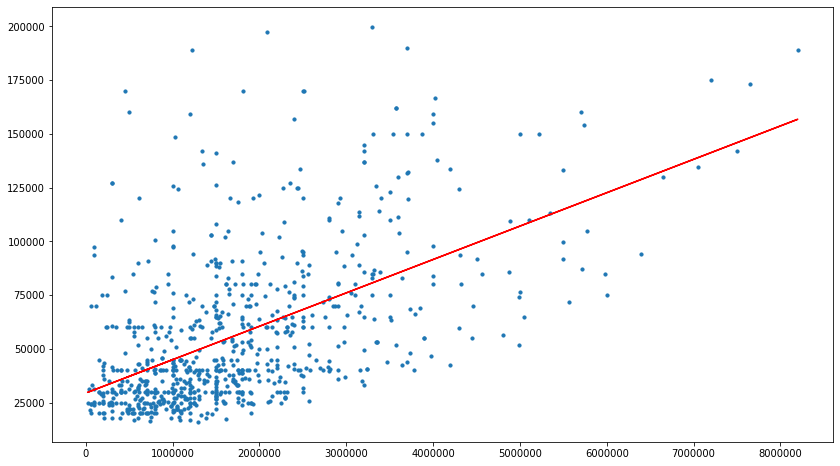

In [24]:
data = data_backup.copy()
data = data[data.hp_exists != 0]
# data = data[data["source policy"] != "Vanilla"]
data = data[(data.income < 200000) & (data.income > 15000) & (~data.income.isin([50000,100000]))]
data = data[(data.hp_max < 9000000) & (data.hp_max > 10000) & (~data.hp_max.isin([2000000,3000000]))]
data = data[data['hp_total'] < data['income']*100]
print("sample count",len(data.index))
print("hp total:- ",data['hp_total'].corr(data['income']))
print("hp avg  :- ",data['hp_avg'].corr(data['income']))
print("hp max  :- ",data['hp_max'].corr(data['income']))
x_train = data[['hp_max']]
y_train = data[['income']]
model = linear_model.LinearRegression()
# model = linear_model.Ridge(alpha=.5)
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.figure(figsize=(14,8))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()

sample count 883
home total:-  0.2940827474214832
home avg  :-  0.29156454668589554
home max  :-  0.337155000126511
model score : 0.0020421297904404945


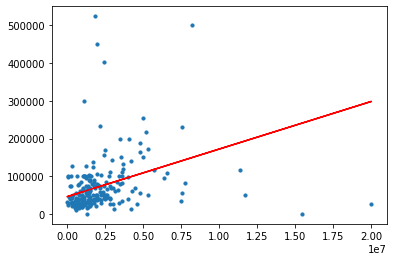

In [0]:
data = pd.concat([xTrain, yTrain], axis=1)
data = data[data.home_exists != 0]
test_data = pd.concat([xTest, yTest], axis=1)
test_data = test_data[test_data.home_exists != 0]
y_test = test_data[['income']]
x_test = test_data[['home_avg']]
print("sample count",len(data.index))
print("home total:- ",data['home_total'].corr(data['income']))
print("home avg  :- ",data['home_avg'].corr(data['income']))
print("home max  :- ",data['home_max'].corr(data['income']))
x_train = data[['home_avg']]
y_train = data[['income']]
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred_home = model.predict(x_test)
print("model score :", model.score(x_test, y_test))
plt.scatter(x_test, y_test, s=10)
plt.plot(x_test, y_pred_home, color='r')
plt.show()

sample count 1504
auto total:-  0.249241197544069
auto avg  :-  0.25397922199479794
auto max  :-  0.29198018288116706
model score : 0.08525242719531989


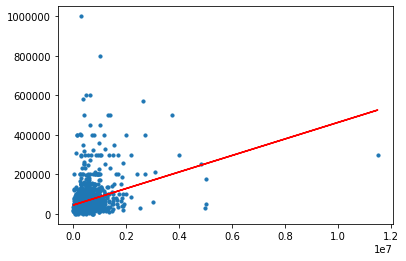

In [0]:
data = data_backup.copy()
data = data[data.auto_exists != 0]
print("sample count",len(data.index))
print("auto total:- ",data['auto_total'].corr(data['income']))
print("auto avg  :- ",data['auto_avg'].corr(data['income']))
print("auto max  :- ",data['auto_max'].corr(data['income']))
x_train = data[['auto_max']]
y_train = data[['income']]
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()

sample count 1283
auto total:-  0.23985455959898153
auto avg  :-  0.27075843375847686
auto max  :-  0.2983699346229903
model score : 0.05730630535161996


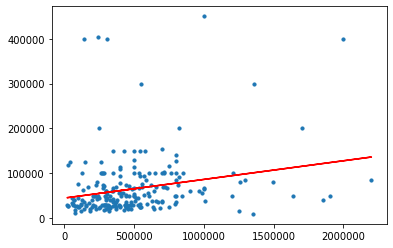

In [0]:
data = pd.concat([xTrain, yTrain], axis=1)
data = data[data.auto_exists != 0]
test_data = pd.concat([xTest, yTest], axis=1)
test_data = test_data[test_data.auto_exists != 0]
y_test = test_data[['income']]
x_test = test_data[['auto_max']]
print("sample count",len(data.index))
print("auto total:- ",data['auto_total'].corr(data['income']))
print("auto avg  :- ",data['auto_avg'].corr(data['income']))
print("auto max  :- ",data['auto_max'].corr(data['income']))
x_train = data[['auto_max']]
y_train = data[['income']]
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred_auto = model.predict(x_test)
print("model score :", model.score(x_test, y_test))
plt.scatter(x_test, y_test, s=10)
plt.plot(x_test, y_pred_auto, color='r')
plt.show()

sample count 2857
other total:-  0.25778841574809386
other avg  :-  0.20729563365765333
other max  :-  0.2510726315627888
model score : 0.06645486729391215


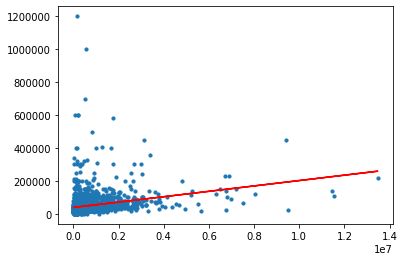

In [0]:
data = data_backup.copy()
data = data[data.other_exists != 0]
print("sample count",len(data.index))
print("other total:- ",data['other_total'].corr(data['income']))
print("other avg  :- ",data['other_avg'].corr(data['income']))
print("other max  :- ",data['other_max'].corr(data['income']))
x_train = data[['other_total']]
y_train = data[['income']]
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()

sample count 2435
other total:-  0.24929581068777593
other avg  :-  0.1956139671395174
other max  :-  0.23949948862460718
model score : 0.025348761229593175


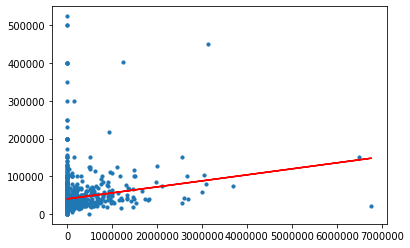

In [0]:
data = pd.concat([xTrain, yTrain], axis=1)
test_data = pd.concat([xTest, yTest], axis=1)
# test_data = test_data[test_data.other_exists != 0]
y_test = test_data[['income']]
x_test = test_data[['other_total']]
data = data[data.other_exists != 0]
print("sample count",len(data.index))
print("other total:- ",data['other_total'].corr(data['income']))
print("other avg  :- ",data['other_avg'].corr(data['income']))
print("other max  :- ",data['other_max'].corr(data['income']))
x_train = data[['other_total']]
y_train = data[['income']]
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred_other = model.predict(x_test)
print("model score :", model.score(x_test, y_test))
income['other'] = y_pred_other
income['other'] =test_data['other_exists']*income['other']
plt.scatter(x_test, y_test, s=10)
plt.plot(x_test, y_pred_other, color='r')
plt.show()

sample count 3648
card total:-  0.09987914421213273
card avg  :-  0.04437165521201801
card max  :-  0.05374928146905884
model score : 0.0019688437862540598


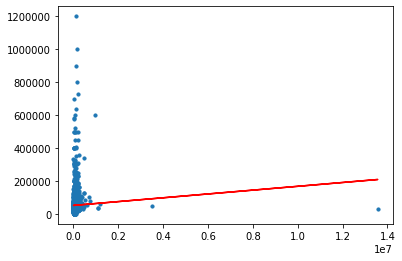

In [0]:
data = data_backup.copy()
data = data[data.card_exists != 0]
print("sample count",len(data.index))
print("card total:- ",data['card_total'].corr(data['income']))
print("card avg  :- ",data['card_avg'].corr(data['income']))
print("card max  :- ",data['card_max'].corr(data['income']))
x_train = data[['card_avg']]
y_train = data[['income']]
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()

sample count 3089
card total:-  0.09502904428616243
card avg  :-  0.04002435963860105
card max  :-  0.04923125287822856
model score : -0.032377219331000795


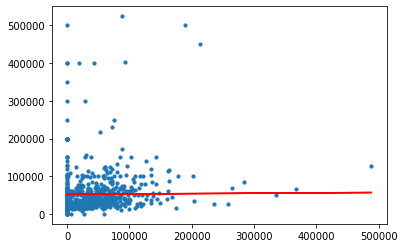

In [0]:
data = pd.concat([xTrain, yTrain], axis=1)
data = data[data.card_exists != 0]
test_data = pd.concat([xTest, yTest], axis=1)
# test_data = test_data[test_data.card_exists != 0]
y_test = test_data[['income']]
x_test = test_data[['card_avg']]
print("sample count",len(data.index))
print("card total:- ",data['card_total'].corr(data['income']))
print("card avg  :- ",data['card_avg'].corr(data['income']))
print("card max  :- ",data['card_max'].corr(data['income']))
x_train = data[['card_avg']]
y_train = data[['income']]
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred_card = model.predict(x_test)
print("model score :", model.score(x_test, y_test))
income['card'] = y_pred_card
income['card'] =test_data['card_exists']*income['card']
plt.scatter(x_test, y_test, s=10)
plt.plot(x_test, y_pred_card, color='r')
plt.show()

In [0]:
income['card'].replace(0, np.nan, inplace=True)
income['other'].replace(0, np.nan, inplace=True)
income['predicted'] = income[['card', 'other']].mean(axis=1)
income['predicted'].replace(0, np.nan, inplace=True)
income['predicted_cat'] = income['predicted'].apply(lambda x: 'nan' if x == 0 else ("low" if x<21667 else ("medium" if x<46250 else ("high" if x<10000000 else 'nan'))))
income['actual'] = yTest
income['actual_cat'] = income['actual'].apply(lambda x: 'nan' if x == 0 else ("low" if x<21667 else ("medium" if x<46250 else ("high" if x<10000000 else 'nan'))))
income = income[['actual', 'actual_cat','predicted','predicted_cat']]
income


,actual,actual_cat,predicted,predicted_cat
4740,"25,000.00",medium,"46,878.58",high
5606,"40,000.00",medium,nan,nan
4824,"19,000.00",low,nan,nan
4205,"20,000.00",low,nan,nan
3228,"41,067.00",medium,"52,555.34",high
...,...,...,...,...
3856,"33,000.00",medium,nan,nan
2017,"30,000.00",medium,"46,148.66",medium
4445,"18,000.00",low,nan,nan
961,"45,000.00",medium,"52,317.98",high


In [0]:
income.to_csv('predicted.csv')